In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from IPython.display import clear_output
import matplotlib.pyplot as matplotlib
import pandas
import numpy
import cv2
import pickle
import os

from keras.models import load_model

from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg19 import preprocess_input
from keras.applications.vgg19 import VGG19
from keras.layers import Flatten, Dense
from keras import Sequential

# Leia o cascader, le a imagem e transforma para o estilo grayscale do CV
face_model = cv2.CascadeClassifier('../input/haarcascades/haarcascade_frontalface_default.xml')

train_dir = '/content/drive/MyDrive/CentraleIADataset/Train'
test_dir = '/content/drive/MyDrive/CentraleIADataset/Test'
val_dir = '/content/drive/MyDrive/CentraleIADataset/Validation'

train_datagen = ImageDataGenerator(rescale=1.0/255, horizontal_flip=True, zoom_range=0.2,shear_range=0.2)
train_generator = train_datagen.flow_from_directory(directory=train_dir,target_size=(128,128),class_mode='categorical',batch_size=4)

val_datagen = ImageDataGenerator(rescale=1.0/255)
val_generator = train_datagen.flow_from_directory(directory=val_dir,target_size=(128,128),class_mode='categorical',batch_size=4)

test_datagen = ImageDataGenerator(rescale=1.0/255)
test_generator = train_datagen.flow_from_directory(directory=test_dir,target_size=(128,128),class_mode='categorical',batch_size=4)


vgg19 = VGG19(weights='imagenet',include_top=False,input_shape=(128,128,3))

for layer in vgg19.layers:
    layer.trainable = False
    
model = Sequential()
model.add(vgg19)
model.add(Flatten())
model.add(Dense(2,activation='sigmoid'))
model.summary()
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics ="accuracy")

history = model.fit_generator(generator=train_generator,
                              steps_per_epoch=len(train_generator)//4,
                              epochs=20,validation_data=val_generator,
                              validation_steps=len(val_generator)//4)
model.evaluate_generator(test_generator)


Found 939 images belonging to 2 classes.
Found 142 images belonging to 2 classes.
Found 140 images belonging to 2 classes.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Functional)           (None, 4, 4, 512)         20024384  
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 16386     
Total params: 20,040,770
Trainable params: 16,386
Non-trainable params: 20,024,384
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
58/58 [==============================] - 76s 1s/step - loss: 0.5030 - accuracy: 0.7457 - val_loss: 0.3230 - val_accuracy: 0.8889
Epoch 2/20
58/58 [==============================] - 59s 1s/step - loss: 0.2564 - accuracy: 0.9138 - val_loss: 0.3746 - val_accuracy: 0.8611
Epoch 3/20
58/58 [==============================] - 55s 949ms/step - loss: 0.1592 - accuracy: 0.9353 - val_loss: 0.2117 - val_accuracy: 0.8889
Epoch 4/20
58/58 [==============================] - 53s 914ms/step - loss: 0.1896 - accuracy: 0.9221 - val_loss: 0.0599 - val_accuracy: 1.0000
Epoch 5/20
58/58 [==============================] - 53s 906ms/step - loss: 0.1908 - accuracy: 0.9394 - val_loss: 0.2009 - val_accuracy: 0.8611
Epoch 6/20
58/58 [==============================] - 53s 922ms/step - loss: 0.1121 - accuracy: 0.9483 - val_loss: 0.2508 - val_accuracy: 0.9444
Epoch 7/20
58/58 [==============================] - 51s 888ms/step - loss: 0.1924 - accuracy: 0.9394 - val_loss: 0.1035 - val_accuracy: 0.9722
Epoch

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2006: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


[0.2247871458530426, 0.9142857193946838]

[[0.9980777  0.00800347]]


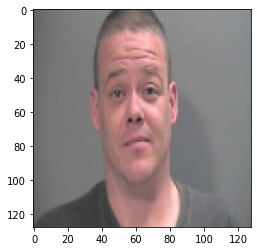

In [ ]:
sample_mask_img = cv2.imread('/content/drive/MyDrive/CentraleIADataset/Test/Drunk/drunk_102.jpg')
sample_mask_img = cv2.cvtColor(sample_mask_img, cv2.IMREAD_GRAYSCALE)
sample_mask_img = cv2.resize(sample_mask_img,(128,128))
sample_mask_img = cv2.cvtColor(sample_mask_img, cv2.COLOR_RGB2BGR) 
matplotlib.imshow(sample_mask_img)
sample_mask_img = numpy.reshape(sample_mask_img,[1,128,128,3])
sample_mask_img = sample_mask_img/255.0
print(model.predict(sample_mask_img))

[[0.07483906 0.961411  ]]


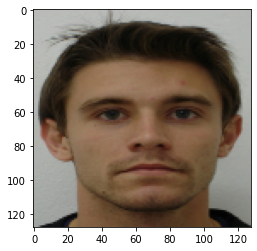

In [ ]:
sample_mask_img = cv2.imread('/content/drive/MyDrive/CentraleIADataset/Test/Sober/normal_100.jpg')
sample_mask_img = cv2.cvtColor(sample_mask_img, cv2.IMREAD_GRAYSCALE)
sample_mask_img = cv2.resize(sample_mask_img,(128,128))
sample_mask_img = cv2.cvtColor(sample_mask_img, cv2.COLOR_RGB2BGR) 
matplotlib.imshow(sample_mask_img)
sample_mask_img = numpy.reshape(sample_mask_img,[1,128,128,3])
sample_mask_img = sample_mask_img/255.0
print(model.predict(sample_mask_img))

7% Drunk 96% Sober


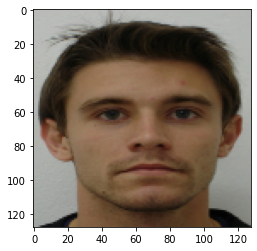

In [ ]:
sample_mask_img = cv2.imread('/content/drive/MyDrive/CentraleIADataset/Test/Sober/normal_100.jpg')
sample_mask_img = cv2.cvtColor(sample_mask_img, cv2.IMREAD_GRAYSCALE)
sample_mask_img = cv2.resize(sample_mask_img,(128,128))
sample_mask_img = cv2.cvtColor(sample_mask_img, cv2.COLOR_RGB2BGR) 
matplotlib.imshow(sample_mask_img)
sample_mask_img = numpy.reshape(sample_mask_img,[1,128,128,3])
sample_mask_img = sample_mask_img/255.0
res = model.predict(sample_mask_img)
print(str(round(res[0][0]*100))+"% Drunk " + str(round(res[0][1]*100))+"% Sober")

In [ ]:
model.save('/content/drive/MyDrive/CentraleIADataset/centralia.h5')

7% Drunk 96% Sober


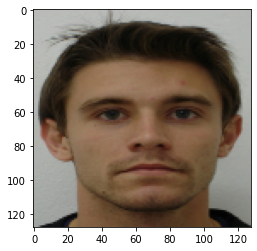

In [ ]:
sample_mask_img = cv2.imread('/content/drive/MyDrive/CentraleIADataset/Test/Sober/normal_100.jpg')
sample_mask_img = cv2.cvtColor(sample_mask_img, cv2.IMREAD_GRAYSCALE)
sample_mask_img = cv2.resize(sample_mask_img,(128,128))
sample_mask_img = cv2.cvtColor(sample_mask_img, cv2.COLOR_RGB2BGR) 
matplotlib.imshow(sample_mask_img)
sample_mask_img = numpy.reshape(sample_mask_img,[1,128,128,3])
sample_mask_img = sample_mask_img/255.0
res = model.predict(sample_mask_img)
print(str(round(res[0][0]*100))+"% Drunk " + str(round(res[0][1]*100))+"% Sober")